<h2>Code-Example: Convolutional Neural Networks</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">In the following, there is an implementation of a simple convolutional neural network. </p>
<p style="text-align:justify">To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page.</p>
<p>The first block will load the necessary libraries and displays one of the images in the training data set. There are images where to areas are horizontally separated and images with vertical separation. The CNN should learn to distinguish those.</p>
<p>In the second block, the data is separated into training data, which is used to train the network, and validation data which is used to validate if the trained network works well. Also the model/network is defined.</p>
<p>In the third block the network is trained and validated with the validation data. </p>
<p>In the last block a new image is loaded which was not in the training or validation data and gets classified.</p>    
    <p>In this example the Tensorflow library (<a href=https://github.com/tensorflow/tensorflow>https://github.com/tensorflow/tensorflow </a>) is used<sup>[1]</sup>.</p>
</font>

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

#Path to data
path = './EasyData'

data_path = pathlib.Path(path)

img_count = len(list(data_path.glob('*/*.png')))
print(img_count)

#show one image from data
circles = list(data_path.glob('Horizontal/*'))
PIL.Image.open(str(circles[0]))

0


IndexError: list index out of range

In [93]:
#set batch size and image size
batch_size = 32
img_height = 128
img_width = 128

#divide data set into training data (80%) and validation data (20%) 
training_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, color_mode='grayscale', validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, color_mode='grayscale', validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)


num_classes = 2 #two classes "vertical" and "horizontal"

#define model: consisting of 2 convolutional and pooling layers
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(1,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(2, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'EasyData'

Epoch 1/10
1/1 [==============================] - 0s 62ms/step - loss: 0.1967 - accuracy: 0.9375 - val_loss: 0.3095 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 0.1508 - accuracy: 1.0000 - val_loss: 0.2875 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 59ms/step - loss: 0.1370 - accuracy: 1.0000 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 61ms/step - loss: 0.1130 - accuracy: 1.0000 - val_loss: 0.2207 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 59ms/step - loss: 0.1120 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.1592 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0814 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

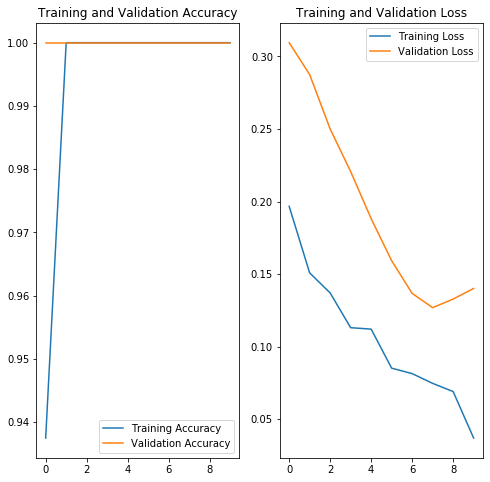

In [94]:
#train model
epochs = 10
history = model.fit(training_data, validation_data = validation_data, epochs=epochs)

#visualize how the trained model performs
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

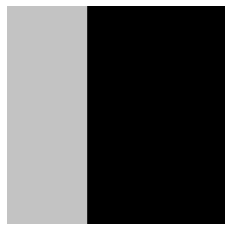

The image probably belongs to class: Vertikal (99.72 %)


In [95]:
#load additional image
test_path = 'TestCNN1.png'
test_img = keras.preprocessing.image.load_img(test_path, color_mode='grayscale', target_size=(img_height, img_width))

test_img_array = keras.preprocessing.image.img_to_array(test_img)
test_img_array = tf.expand_dims(test_img_array, 0)

im = plt.imread('TestCNN1.png')
plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")
plt.show()

#classify image with the trained model
predictions = model.predict(test_img_array)
score = tf.nn.softmax(predictions[0])
print("The image probably belongs to class: {} ({:.2f} %)" .format(training_data.class_names[np.argmax(score)], 100 * np.max(score)))


<p><sup>[1]</sup> Copyright 2019 The TensorFlow Authors.  All rights reserved.

                                 Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/